In [50]:
import os
from collections import Counter
import numpy as np
from pyhanlp import *
import pandas as pd

# 1 词频与词排名的关系

In [54]:
!pip install test_utility

  Could not find a version that satisfies the requirement test_utility (from versions: )
No matching distribution found for test_utility
You are using pip version 10.0.1, however version 20.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
# from test_utility import ensure_data
# sighan05 = ensure_data('icwb2-data','http://sighan.cs.uchicago.edu/bakeoff2005/data/icwb2-data.zip')

## icwb2-data
icwb2-data是一个中文分词数据集
sighan05是icwb2-data最终需要存放的路径

In [56]:
 sighan05 = r'D:\Anaconda\Lib\site-packages\pyhanlp\static\data\test\icwb2-data'

os.oath.join()是os库中用于路径拼接的方法，下面代码是在sighan05路径后拼接training和msr_training.utf8

os.oath.join()用法：
（1）如果各组件名首字母不包含’/’，则函数会自动加上
（2）如果有一个组件是一个绝对路径，则在它之前的所有组件均会被舍弃
（3）如果最后一个组件为空，则生成的路径以一个’/’分隔符结尾

In [69]:
msr = os.path.join(sighan05,'training','msr_training.utf8')
msr

'D:\\Anaconda\\Lib\\site-packages\\pyhanlp\\static\\data\\test\\icwb2-data\\training\\msr_training.utf8'

In [64]:
f = Counter()
with open(msr,encoding='utf-8') as src:
    for line in src:
        line = line.strip()
        for word in line.split(' '):
            f[word] += 1

[('，', 173173), ('的', 128146), ('。', 81757), ('、', 40695), ('在', 28445), ('了', 27103), ('和', 24398), ('是', 18068), ('”', 16867), ('“', 16686), ('一', 11503), ('有', 9905), ('对', 9654), ('为', 9516), ('中', 9444), ('上', 8408), ('不', 7222), ('这', 7198), ('与', 7197), ('他', 7062), ('就', 6485), ('人', 6338), ('到', 6316), ('等', 6008), ('：', 5988), ('发展', 5976), ('说', 5973), ('也', 5801), ('要', 5660), ('将', 5651)]


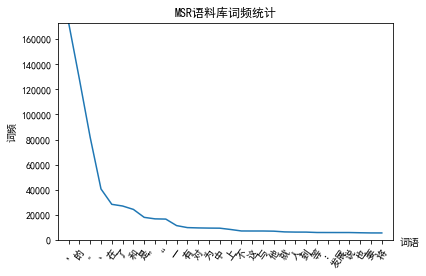

In [67]:
f = Counter()
with open(msr, encoding='utf-8') as src:
    for line in src:
        line = line.strip()
        for word in line.split('  '):
            # word = word.strip()
            # if len(word) < 2: continue
            f[word] += 1


def plot(token_counts, title='MSR语料库词频统计', ylabel='词频'):
    from matplotlib import pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    fig = plt.figure(
        # figsize=(8, 6)
    )
    ax = fig.add_subplot(111)
    token_counts = list(zip(*token_counts))
    num_elements = np.arange(len(token_counts[0]))
    top_offset = max(token_counts[1]) + len(str(max(token_counts[1])))
    ax.set_title(title)
    ax.set_xlabel('词语')
    ax.set_ylabel(ylabel)
    ax.xaxis.set_label_coords(1.05, 0.015)
    ax.set_xticks(num_elements)
    ax.set_xticklabels(token_counts[0], rotation=55, verticalalignment='top')
    ax.set_ylim([0, top_offset])
    ax.set_xlim([-1, len(token_counts[0])])
    rects = ax.plot(num_elements, token_counts[1], linewidth=1.5)
    plt.show()


word_freq = f.most_common(30)
print(word_freq)
plot(word_freq)
# log_word_freq = []
# for w, f in word_freq:
#     log_word_freq.append((w, np.log(f)))
# plot(log_word_freq, ylabel='词频的对数')

In [70]:
import os
print(os.path.abspath('.'))

E:\王泓儒\NLP\练习代码\Untitled Folder
